## 1. Data Loading

In [4]:
from utils_NB import *
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

df_processed = pd.read_csv(PROCESSED_DATA_DIR/'processed_data.csv')


### 1.1 Checking Data's Information

In [5]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            26304 non-null  object 
 1   DA_Price             26304 non-null  float64
 2   actual_load          26304 non-null  float64
 3   forecast_load        26304 non-null  float64
 4   solar_generation     26304 non-null  float64
 5   wind_on_generation   26304 non-null  float64
 6   wind_off_generation  26304 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.4+ MB


In [14]:
df_processed.isna().sum()

DA_Price               0
actual_load            0
forecast_load          0
solar_generation       0
wind_on_generation     0
wind_off_generation    0
dtype: int64

In [6]:
df_processed.describe()

DA_Price   actual_load  forecast_load  solar_generation  \
count  26304.000000  26304.000000   26304.000000      26304.000000   
mean     138.287434  49404.990146   44281.306905        234.452574   
std      113.140711   8168.344790    8994.208734        369.202149   
min     -500.000000  21532.740000    1915.080000          0.000000   
25%       75.897500  43300.355000   39824.690000          0.000000   
50%      106.185000  48628.130000   44481.325000          7.265000   
75%      174.702500  54560.235000   49690.505000        359.622500   
max      872.960000  85857.350000   85027.690000       1710.810000   

       wind_on_generation  wind_off_generation  
count        26304.000000         26304.000000  
mean          3464.951289          5281.244290  
std           2713.256610          4291.819761  
min             22.810000             0.000000  
25%           1127.170000          1503.600000  
50%           2681.790000          4288.175000  
75%           5433.212500          8438.005000  
max          14647.780000         17371.930000

## 2. Visualizing Data

In [7]:
fig = make_subplots(rows=7, cols=1)

fig.add_trace(go.Scatter(
    x=df_processed['timestamp'],
    y=df_processed['DA_Price'],
    name='DA_Price',
    #xaxis_title='Time',
    #yaxis_title='Price [Eur/MWh]'
    ),
    row=1,
    col=1
)

fig.add_trace(go.Scatter(
    x=df_processed['timestamp'],
    y=df_processed['actual_load'],
    name='Actual_load',
    #xaxis_title='Time',
    #yaxis_title='Load [MW]'
    ),
    row=2,
    col=1
)

fig.add_trace(go.Scatter(
    x=df_processed['timestamp'],
    y=df_processed['solar_generation'],
    name='Solar_generation',
    #xaxis_title='Time',
    #yaxis_title='Load [MW]'
    ),
    row=3,
    col=1
)

fig.add_trace(go.Scatter(
    x=df_processed['timestamp'],
    y=df_processed['wind_on_generation'],
    name='wind_onshore_generation',
    #xaxis_title='Time',
    #yaxis_title='Load [MW]'
    ),
    row=4,
    col=1
)

fig.add_trace(go.Scatter(
    x=df_processed['timestamp'],
    y=df_processed['wind_off_generation'],
    name='wind_offshore_generation',
    #xaxis_title='Time',
    #yaxis_title='Load [MW]'
    ),
    row=5,
    col=1
)

fig.add_trace(go.Scatter(
    x=df_processed['timestamp'],
    y=df_processed['forecast_load'],
    name='Forecast_load',
    #xaxis_title='Time',
    #yaxis_title='Load [MW]'
    ),
    row=6,
    col=1
)

fig.update_layout(
    height=1200,
    width=1000
)

fig.update_xaxes(title='Time [hr]')

fig.update_yaxes(
    title_text='Price [Eur/MWh]',
    row=1,
    col=1
)

for i in range(2,7):
    fig.update_yaxes(
        title_text='Load [MW]',
        row=i,
        col=1
    )

fig.show()

### 2.1 Price Data Distribution

In [8]:
fig = px.histogram(df_processed, x='DA_Price', title='Price Distribution', marginal='box')

fig.update_layout(
    xaxis_title='DA Price [EUR/MWh]',
    yaxis_title='Frequency'
)

fig.show()

## 3. Understanding Correlation between each Data Variable

In [10]:
df_processed

DA_Price  actual_load  forecast_load  solar_generation  \
timestamp                                                               
2022-01-01 00    124.70     41496.57       46128.77               0.0   
2022-01-01 01    124.70     40999.67       44340.42               0.0   
2022-01-01 02    134.00     39628.14       43223.03               0.0   
2022-01-01 03     58.80     39129.22       42704.99               0.0   
2022-01-01 04     37.67     38358.10       42575.67               0.0   
...                 ...          ...            ...               ...   
2024-12-31 19     70.56     60049.18       63103.15               0.0   
2024-12-31 20     59.90     56237.66       60866.66               0.0   
2024-12-31 21     18.20     53070.46       57818.33               0.0   
2024-12-31 22      9.06     50768.73       54357.03               0.0   
2024-12-31 23      0.52     49218.81       52040.91               0.0   

               wind_on_generation  wind_off_generation  
timestamp                                               
2022-01-01 00             6257.84              7461.11  
2022-01-01 01             5910.93              7357.32  
2022-01-01 02             5476.46              5716.79  
2022-01-01 03             5612.37              5396.23  
2022-01-01 04             5639.98              5744.35  
...                           ...                  ...  
2024-12-31 19             9905.24             14843.57  
2024-12-31 20            10031.51             14871.62  
2024-12-31 21            10045.80             14978.18  
2024-12-31 22             9854.30             14747.66  
2024-12-31 23             9773.82             14877.99  

[26304 rows x 6 columns]

In [12]:
#df_processed = df_processed.set_index('timestamp')

correls = df_processed.corr()

heat_map = ff.create_annotated_heatmap(
    z=correls.values,
    y=list(correls.index),
    x=list(correls.columns),
    annotation_text=correls.round(2).values,
    showscale=True
)


heat_map.show()

### 3.1 Checking Autocorrelation

In [33]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

#plot_acf(df_processed['DA_Price'], lags=730)
df_acf = acf(df_processed['DA_Price'], nlags=9000)

fig_acf = go.Figure(data=go.Scatter(
    x=np.arange(len(df_acf)),
    y=df_acf,
    name='ACF'
))

fig_acf.show()

In [32]:
from statsmodels.tsa.stattools import pacf

#plot_acf(df_processed['DA_Price'], lags=730)
df_pacf = pacf(df_processed['DA_Price'], nlags=300)

fig_pacf = go.Figure(data=go.Scatter(
    x=np.arange(len(df_pacf)),
    y=df_pacf,
    name='PACF'
))

fig_pacf.show()

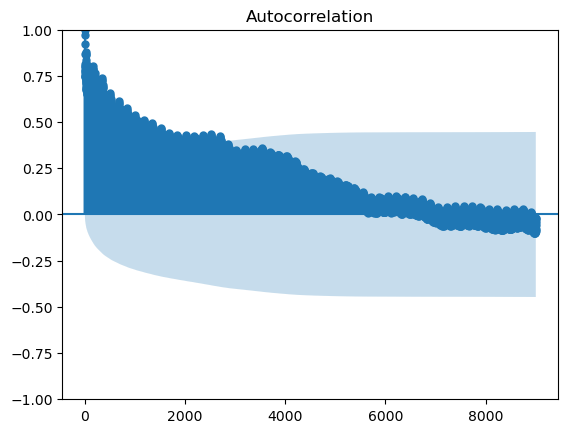

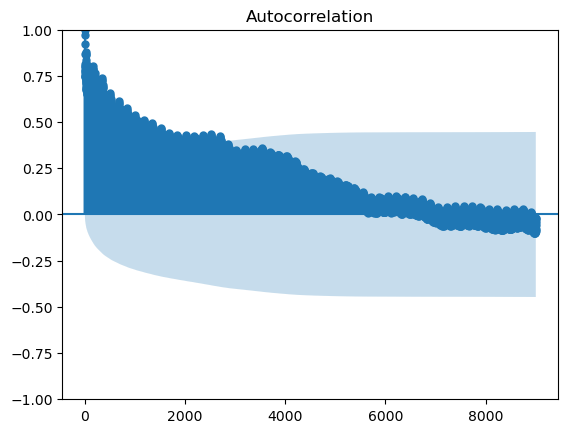

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_processed['DA_Price'], lags=9000)

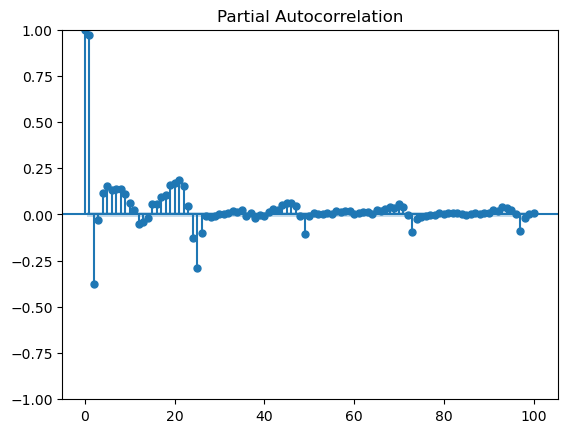

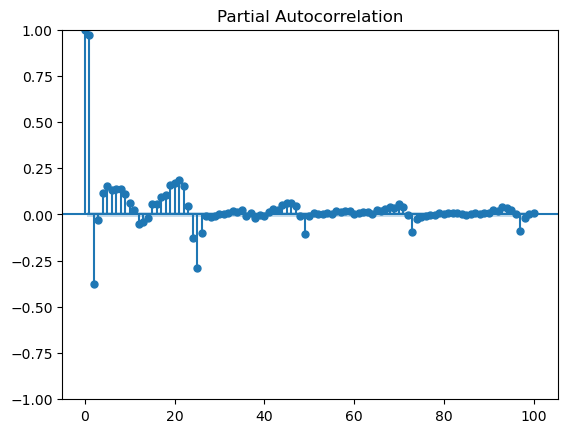

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_processed['DA_Price'], lags=100)


### 3.2 Stationarity Test

In [38]:
from statsmodels.tsa.stattools import adfuller


y = df_processed['DA_Price']
result = adfuller(y, autolag='AIC')

adf_statistic = result[0]
p_value       = result[1]
n_lags        = result[2]
n_obs         = result[3]
crit_values   = result[4]

print("ADF statistic:", adf_statistic)
print("p-value:", p_value)
print("Used lags:", n_lags)
print("Number of observations:", n_obs)
print("Critical values:")
for level, cv in crit_values.items():
    print(f"  {level}: {cv}")

ADF statistic: -6.13481651524121
p-value: 8.235565829112257e-08
Used lags: 49
Number of observations: 26254
Critical values:
  1%: -3.430599102593299
  5%: -2.8616500960359854
  10%: -2.5668286008605627


In [39]:
y_diff = y.diff().dropna()
adf_diff = adfuller(y_diff, autolag="AIC")
print("p-value after differencing:", adf_diff[1])


p-value after differencing: 0.0
